## Table of Content

1. **[Header Files](#lib)**
2. **[About Data Set](#about)**
3. **[Data Preparation](#prep)**
    - 3.1 - **[Read Data](#read)**
    - 3.2 - **[Analysing Missing Values](#miss)**
    - 3.3 - **[Analysing Outliers](#outliers)**
    - 3.4 - **[Analysing the data set](#dt)**
    - 3.5 - **[Scaling](#scale)**   
    - 3.6 - **[Encoding](#encode)** 
    
4. **[Determining Optimal Linkage Method](#ol)**
5. **[Visualizing the clusters](#vis)**
6. **[Agglomerative Clustering](#ag)**
7. **[KMeans Clustering](#kmeans)**
8. **[Principal Component Analysis](#PCA)**
9. **[Kernel PCA](#kpca)**
10. **[Density Based Clustering](#dbscan)**

Data Set - https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

<a id='lib'></a>
## 1. Header Files

In [306]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

# Header Files for Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Header Files for finding optimal linkage for clustering
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Header files for visualizing the clusters
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from yellowbrick.cluster import SilhouetteVisualizer

# Header Files for Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Header Files for KMeans Custering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Header files for dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

# Header files for DBSCan
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN


<a id='about'></a>
## 2.About Data Set


Customer ID - Unique identification of customer

Gender - Sex of the customer

Age - Age of customer

Annual Income - Income of salary in 1000's unit Dollars

Spending Score - Readiness of customer to spend money

<a id='prep'></a>
## 3.Data Preperation

<a id='read'></a>
### 3.1 Read the data

In [307]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<a id='miss'></a>
### 3.2 Analysing Missing Values

In [308]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Note- No missing Values in data

<a id='outliers'></a>
### 3.3 Analysing Outliers

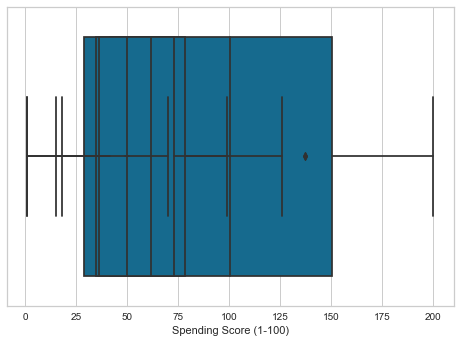

In [309]:
for x in df.select_dtypes(np.number).columns:
    sns.boxplot(df[x])
    plt.show()

Note: Very Few Outliers

<a id='dt'></a>
### 3.4 Analysing the data set

In [310]:
df.shape

(200, 5)

In [311]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [313]:
# Analysing range of numerical columns
df.describe().T[['min','max']]

,min,max
CustomerID,1.0,200.0
Age,18.0,70.0
Annual Income (k$),15.0,137.0
Spending Score (1-100),1.0,99.0


In [314]:
# Analysing categorical Variables
for x in df.select_dtypes(exclude=np.number):
    print(df[x].value_counts())

Female    112
Male       88
Name: Gender, dtype: int64


In [315]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [316]:
df=df.drop('CustomerID',axis=1)

In [317]:
# Maintaining a copy of the data
data=df.copy()
df_num=df.select_dtypes(np.number)
df_cat=df.select_dtypes(exclude=np.number)

 <a id='scale'></a>
### 3.5 Scaling

In [318]:
ss=StandardScaler()
df_nums=pd.DataFrame(ss.fit_transform(df_num),columns=df_num.columns)
df_nums

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


<a id='encode'></a>
### 3.6 Encoding

In [319]:
df1=pd.concat([df_nums,df_cat],axis=1)
df1.head(2)

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,Male
1,-1.281035,-1.738999,1.195704,Male


In [320]:
df_processed=pd.get_dummies(df1,columns=['Gender'])
df_processed.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,0,1
1,-1.281035,-1.738999,1.195704,0,1
2,-1.352802,-1.700830,-1.715913,1,0
3,-1.137502,-1.700830,1.040418,1,0
4,-0.563369,-1.662660,-0.395980,1,0


<a id='ol'></a>
## 4.Determining Optimal Linkage Method

In [321]:
# Method with highest cophenetic score is the optimal linkage method

coph=dict()
for method in ['ward','average','complete','single']:
    mergings=linkage(df_processed,method=method)
    c,d=cophenet(mergings,pdist(df_processed))
    coph[method]=c
print(coph)

print('\nOptimal Linkage Method:',max(coph))

{'ward': 0.6043644300385548, 'average': 0.6438209364533817, 'complete': 0.5713961441546116, 'single': 0.3923303160906059}

Optimal Linkage Method: ward


<a id='vis'></a>
## 5.Visualizing the clusters

In [322]:
df_cluster=df_processed.copy()

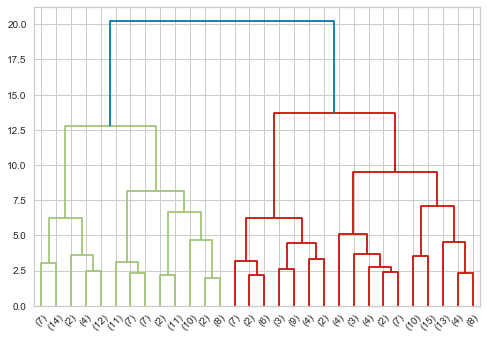

In [323]:
# Done to find an approx value of k
mergings=linkage(df_processed,method='ward',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp')
plt.show()

Note : 

1. Determining optimal number of clusters using dendrogram is confusing
    
2. High time complexity

In [324]:
df_cluster['cluster']=cut_tree(mergings,n_clusters=4)
df_cluster.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,-1.424569,-1.738999,-0.434801,0,1,0
1,-1.281035,-1.738999,1.195704,0,1,1
2,-1.352802,-1.700830,-1.715913,1,0,0
3,-1.137502,-1.700830,1.040418,1,0,1
4,-0.563369,-1.662660,-0.395980,1,0,0


In [325]:
#Analysing The Cluster
df_cluster.cluster.value_counts()

0    70
1    58
2    39
3    33
Name: cluster, dtype: int64

<a id='ag'></a>
## 6.Agglomerative Clustering

Logic - Each Observation is a unique cluster at the initial step then iteratively moves to add more similar points to the cluster.This process is continued till all observations are fused to a single cluster

Note - Doesnt work well with very large data(Computational Cost is very high)

In [326]:
model=AgglomerativeClustering(n_clusters=5)
model.fit(df_processed)
df_cluster['ag_cluster']=model.labels_
model.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 1, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 1, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int64)

In [327]:
df_cluster.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster,ag_cluster
0,-1.424569,-1.738999,-0.434801,0,1,0,4
1,-1.281035,-1.738999,1.195704,0,1,1,0
2,-1.352802,-1.700830,-1.715913,1,0,0,4
3,-1.137502,-1.700830,1.040418,1,0,1,0
4,-0.563369,-1.662660,-0.395980,1,0,0,4


In [328]:
df_cluster.ag_cluster.value_counts()

0    58
1    50
3    39
2    33
4    20
Name: ag_cluster, dtype: int64

In [329]:
df_processed.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

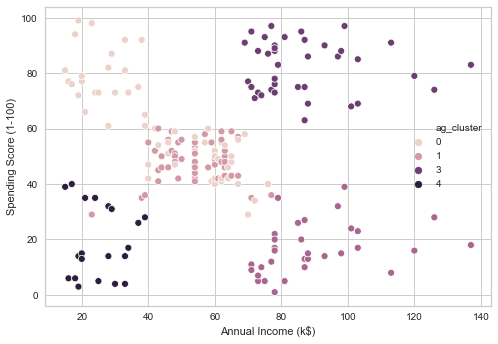

In [330]:
# Visualizing the cluster
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=df_cluster.ag_cluster)
plt.show()

<a id='kmeans'></a>
## 7. KMeans Clustering (Lloyds Algorithm)

Logic: Clusters data by seperating data into groups of equal variance.

Note: A cluster is said to be a good cluster when

1.Clusters are well packed

2.Clusters are well seperated

### 7.1 Optimal Value of K for Kmeans clustering

There are two methods to calculate the optimal value of K 

1. Elbow Plot

2. Silhoutte Method

### 7.1.1 Elbow Plot

The aim of ploting an elbow plot is to find an optimal value of k such that varience within clusters is lowest and the number of clusters is not too large to interpret.

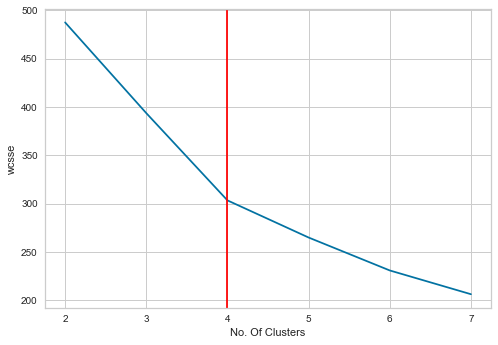

In [331]:
#wcss is within cluster sum of squared errors.
wcsse=[]

for k in np.arange(2,8):
    model=KMeans(n_clusters=k,random_state=5)
    model.fit(df_processed)
    wcsse.append(model.inertia_)
    
plt.plot(np.arange(2,8),wcsse)
plt.axvline(4,c='red')
plt.xlabel('No. Of Clusters')
plt.ylabel('wcsse')
plt.show()
    

The value of k is selelected at the point where an elbow is formed, hence the name elbow plot.(Here 4)

### 7.1.2 Silhoutte Method

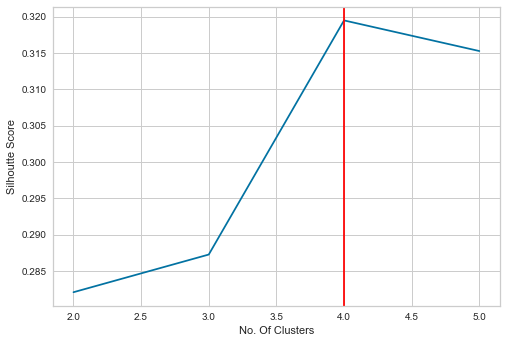

In [335]:
score=[]
for k in np.arange(2,6):
    model=KMeans(n_clusters=k,random_state=5)
    cluster=model.fit_predict(df_processed)
    score.append(silhouette_score(df_processed,cluster))

plt.plot(np.arange(2,6),score)
plt.axvline(4,c='red')
plt.xlabel('No. Of Clusters')
plt.ylabel('Silhoutte Score')
plt.show()

The point at which silhouette score is highest is considered as the optimal value for number of clusters.

### 7.1.3 Silhoutte Visualizer

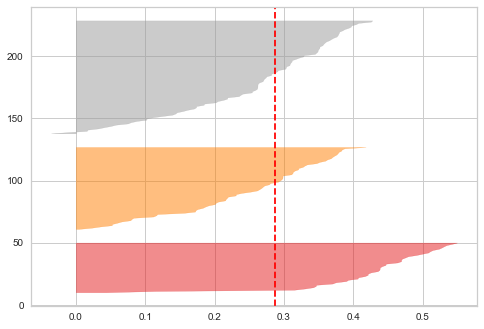

In [336]:
clust_mod=KMeans(n_clusters=3,random_state=5)
viz=SilhouetteVisualizer(clust_mod)
viz.fit(df_processed)
plt.show()

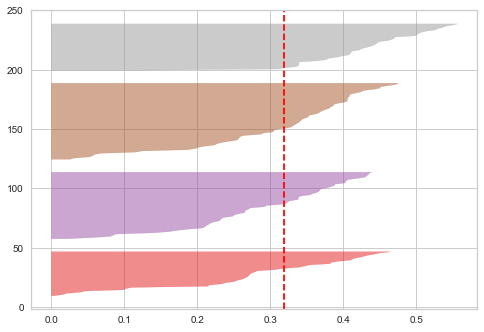

In [337]:
clust_mod=KMeans(n_clusters=4,random_state=5)
viz=SilhouetteVisualizer(clust_mod)
viz.fit(df_processed)
plt.show()

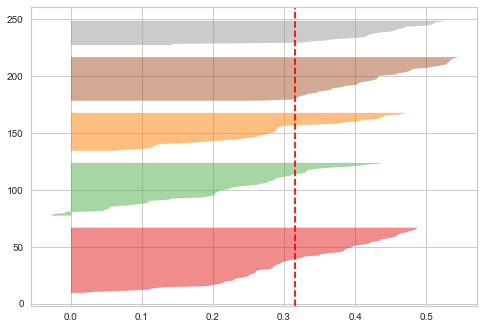

In [338]:
clust_mod=KMeans(n_clusters=5,random_state=5)
viz=SilhouetteVisualizer(clust_mod)
viz.fit(df_processed)
plt.show()

### 7.1.4 KMeans Model

In [339]:
model=KMeans(n_clusters=4,random_state=5)
cluster=model.fit_predict(df_processed)

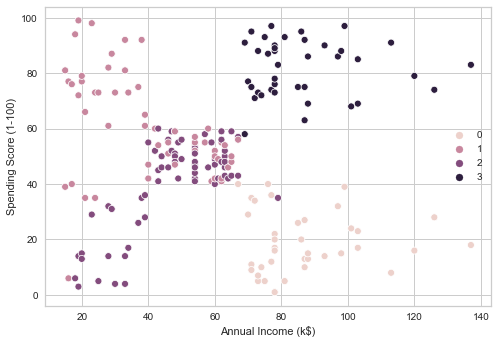

In [340]:
# Visualizing the cluster
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=cluster)
plt.show()


In the middle there are is no clear seperation in the clusters(Could be because the two features selected at random doesnot explain maximum variance).

Dimensionality reduction techniques like PCA or KPCA can be used to find the best vectors to represent clusters in lower dimensions.

<a id='PCA'></a>
## 8. Principal Component Analysis

PCA is a method used to represent the data in lower dimensions by creating new features that capture maximum variance.

In [341]:
pca=PCA()
pca.fit(df_processed)
np.cumsum(pca.explained_variance_ratio_)*100

array([ 38.13256577,  66.84037061,  86.10219256, 100.        ,
       100.        ])

In [342]:
df_pca=pd.DataFrame(pca.transform(df_processed))
col=['PC'+str(x) for x in np.arange(1,6)]
df_pca.columns=col
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.575724,-1.684874,1.315210,0.984750,4.276514e-15
1,-1.623595,-1.726481,0.060149,1.049601,4.554069e-15
2,0.279614,-1.725314,2.182574,-0.485724,2.682949e-15
3,-1.511064,-1.796205,0.080242,-0.374564,3.182550e-15
4,-0.095468,-1.707347,0.690684,-0.473954,2.849483e-15


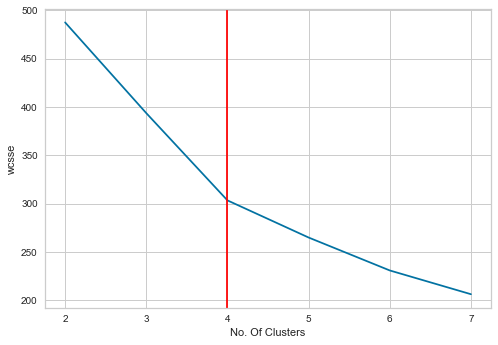

In [343]:
# Finding optimal number of clusters
wcsse=[]

for k in np.arange(2,8):
    model=KMeans(n_clusters=k,random_state=5)
    model.fit(df_pca)
    wcsse.append(model.inertia_)
    
plt.plot(np.arange(2,8),wcsse)
plt.axvline(4,c='red')
plt.xlabel('No. Of Clusters')
plt.ylabel('wcsse')
plt.show()

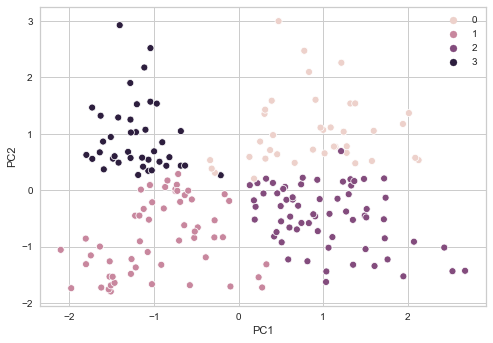

In [344]:
model=KMeans(n_clusters=4,random_state=5)
cluster=model.fit_predict(df_pca)

# Visualizing the cluster

sns.scatterplot(df_pca['PC1'],df_pca['PC2'],hue=cluster)
plt.show()

<a id='kpca'></a>
## 9. Kernel PCA

Kernel PCA uses a function to project non linear data onto a higher dimension inorder to make it linearly seperable and then uses PCA.

In [345]:
kpca= KernelPCA(n_components=2)
kpca.fit(df_processed)
df_kpca=pd.DataFrame(kpca.fit_transform(df_processed),columns=['PC1','PC2'])
df_kpca.head()

,PC1,PC2
0,-0.575724,-1.684874
1,-1.623595,-1.726481
2,0.279614,-1.725314
3,-1.511064,-1.796205
4,-0.095468,-1.707347


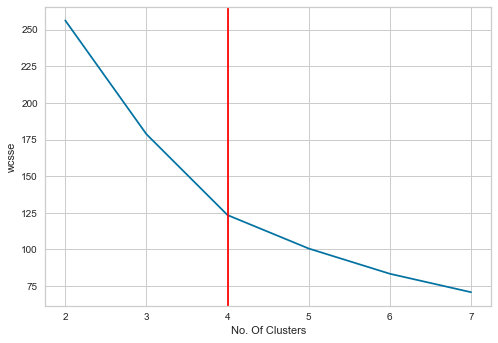

In [346]:
# Finding optimal number of clusters
wcsse=[]

for k in np.arange(2,8):
    model=KMeans(n_clusters=k,random_state=5)
    model.fit(df_kpca)
    wcsse.append(model.inertia_)
    
plt.plot(np.arange(2,8),wcsse)
plt.axvline(4,c='red')
plt.xlabel('No. Of Clusters')
plt.ylabel('wcsse')
plt.show()

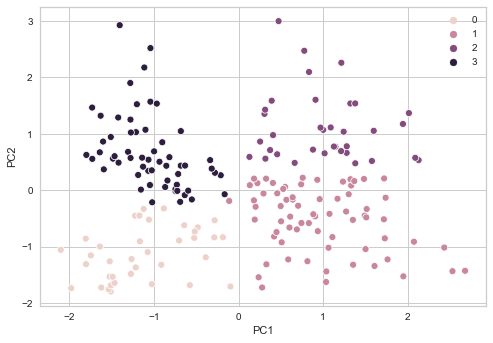

In [347]:
model=KMeans(n_clusters=4,random_state=5)
cluster=model.fit_predict(df_kpca)
sns.scatterplot(df_kpca['PC1'],df_kpca['PC2'],hue=cluster)
plt.show()


When compared to the results of pca at the edges the clusters are not overlapping . But the main application of KPCA is when the points are not linearly seperable.

<a id='dbscan'></a>
## 9. Density Based Clustering (DBScan)

DBScan forms clusters of non linear shapes. The main application of DBScan is in outlier detection. The regions are not densely populated are considered to be outliers.

DBScan has 2 main parameters to be considered : 

1. eps - Radius of neighbourhood of a data point

2. min_samples - Number of points inside epsilon neighborhood to be considered as a core point

### 9.1 Finding optimal value of epsilon

In [348]:
nn=NearestNeighbors(n_neighbors=4)
nn.fit(df_processed)

NearestNeighbors(n_neighbors=4)

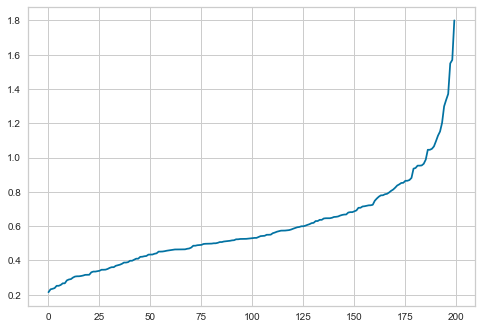

In [349]:
distance,index=nn.kneighbors(df_processed)
plt.plot(np.sort(distance[:,3]))
plt.show()

### 9.2 DBScan 

In [350]:
df_db=df_kpca.copy()

In [351]:
model=DBSCAN(eps=1,min_samples=5)
df_db['cluster']=model.fit_predict(df_processed)
df_db.cluster.value_counts()

 1    110
 0     77
-1     13
Name: cluster, dtype: int64

-1 represents outliers

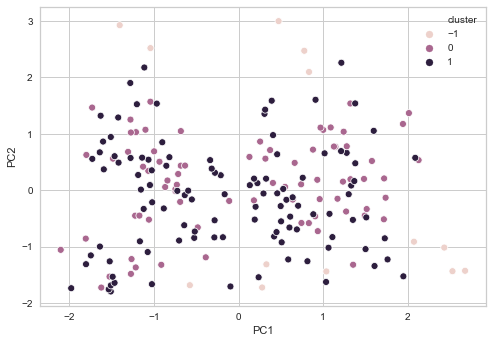

In [352]:
# Visualizing the cluster to identify outliers
sns.scatterplot(df_db['PC1'],df_kpca['PC2'],hue=df_db['cluster'])

Points in Light Pink are the outliers

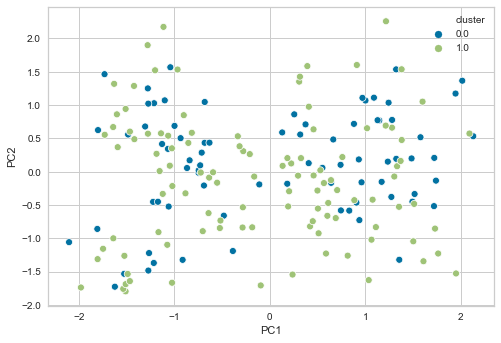

In [353]:
# Removing the identified outliers
df_db=df_db[df_db.cluster != -1]
sns.scatterplot(df_db['PC1'],df_kpca['PC2'],hue=df_db['cluster'])